In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Information on the dataset

In [3]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [4]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [7]:
print(data_info.loc['loan_amnt']['Description'])

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


#### Function to get the description of parameters

In [8]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [10]:
feat_info('mort_acc')

Number of mortgage accounts.


#### Import other data points

In [13]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## We are predicting the loan_status

#### Countplot: Is the sample dataset balanced ?

<AxesSubplot:xlabel='loan_status', ylabel='count'>

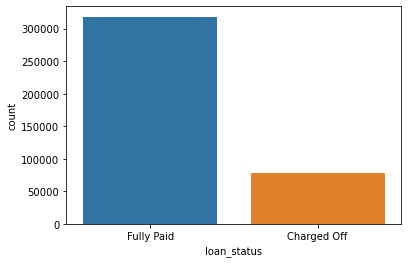

In [16]:
sns.countplot(x='loan_status', data=df)

#### Visualise the loan amount

C:\Users\sayan\anaconda3\envs\mytfenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

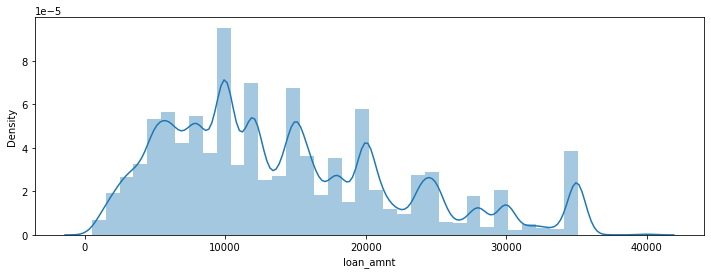

In [18]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=True,bins=40)

#### Explore Correlation between the parameters

In [19]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

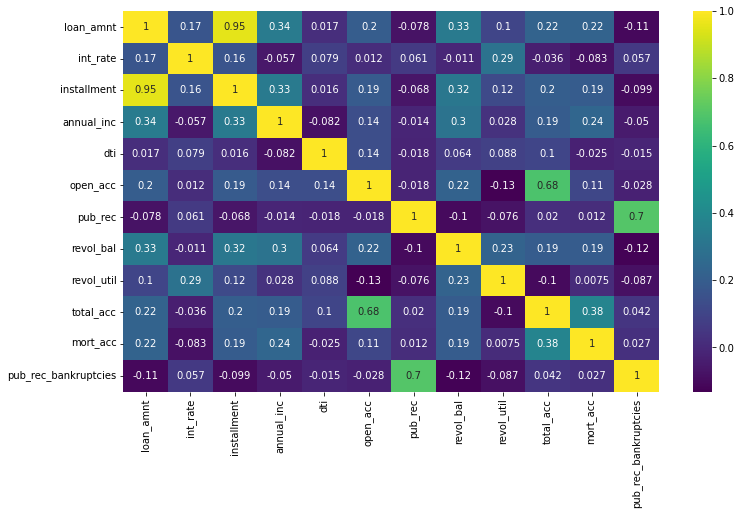

In [20]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

#### Loan amount has good correlation with installment. Need to explore more!

In [21]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [22]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

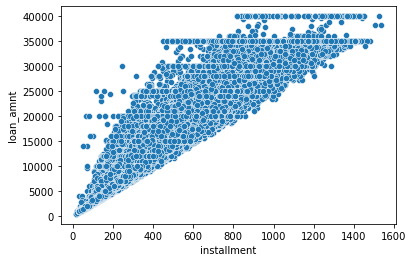

In [23]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

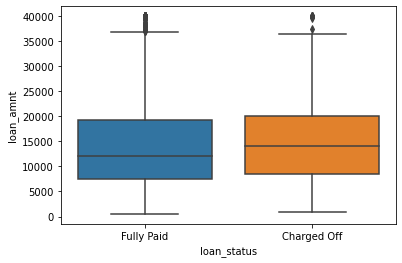

In [25]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
# This is not a key indicator even though we see slight relation where higher loans are difficult to be fully paid

In [31]:
# Let's see the numbers when grouped by (look at the means)

In [30]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [33]:
feat_info('grade')

LC assigned loan grade


In [34]:
feat_info('sub_grade')

LC assigned loan subgrade


In [35]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [36]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

#### Countplot per sub_grade

<AxesSubplot:xlabel='grade', ylabel='count'>

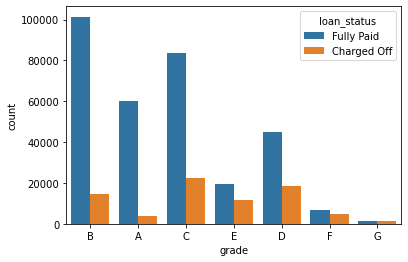

In [39]:
sns.countplot(data=df,x='grade', hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

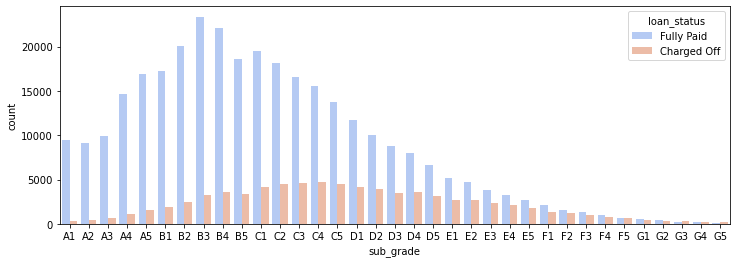

In [47]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(data=df,x='sub_grade', order=subgrade_order, hue='loan_status',palette='coolwarm')

In [48]:
# We see F's and G's doesn't get paid back that well! 

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

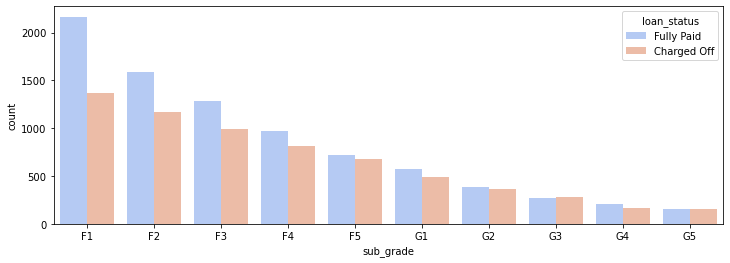

In [51]:
# Filter F&G

f_and_g=df[(df['grade']=='F') | (df['grade']=='G')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(data=f_and_g,x='sub_grade', order=subgrade_order, hue='loan_status',palette='coolwarm')

## Changing the Loan_Status to '1' or '0' --> Mapping (Label Column which we use later)

In [54]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

#### We see which features has the maximum correlation

<AxesSubplot:>

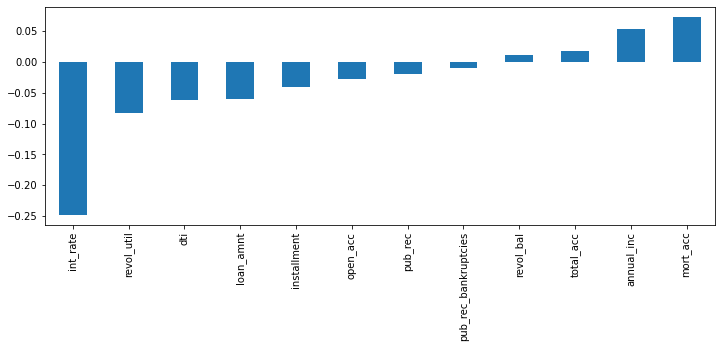

In [58]:
plt.figure(figsize=(12,4))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Data Pre-Processing

In [59]:
len(df)

396030

## Inspect missing values

In [61]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [63]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [64]:
# We can think to drop lower percentage of data which are missing

In [65]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [66]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [67]:
# Do we drop or fill it with some values?

In [70]:
df['emp_title'].nunique()

173105

In [71]:
# Emp_title has too many unique values and doesn't seem useful, so we remove it!

In [72]:
df=df.drop('emp_title', axis=1)

In [73]:
# Emp_length?

In [81]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [87]:
emp_length_order=['< 1 year',
'1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
'10+ years'
 ]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

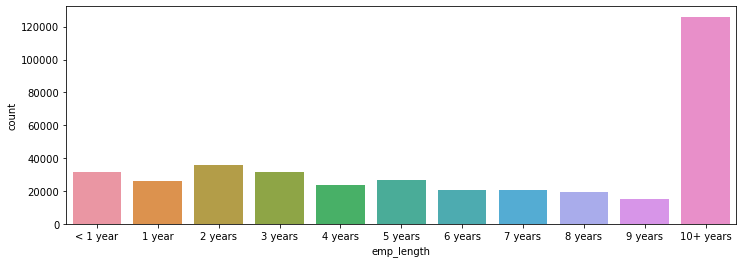

In [89]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

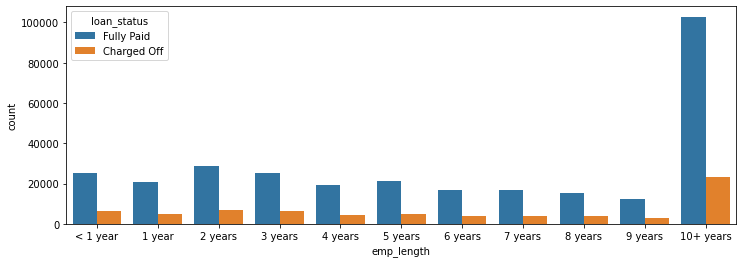

In [90]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order, hue='loan_status')

#### Figure out the ratio of fully paid vs charged off on every emp_length

In [99]:
 emp_co=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [100]:
 emp_fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [106]:
emp_len=100*emp_co/(emp_co+emp_fp)

In [110]:
# This shows it actually doesn't have much relation since the ratios are similar. So we can drop it!

<AxesSubplot:xlabel='emp_length'>

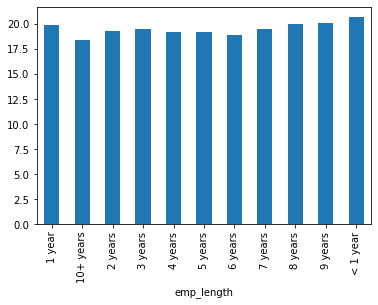

In [109]:
emp_len.plot(kind='bar')

In [111]:
df=df.drop('emp_length', axis=1)

In [113]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [114]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [115]:
feat_info('title')

The loan title provided by the borrower


In [116]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [117]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [118]:
# Mostly similar, same information. Drop title!

In [119]:
df=df.drop('title',axis=1)

In [120]:
feat_info('mort_acc')

Number of mortgage accounts.


In [121]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [122]:
# Can we fill out this information with the help of correlation from other features?

In [126]:
df.corr()['mort_acc'].drop('mort_acc').sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

In [127]:
# total_acc correlates well with mort_acc. So we fill it with the mean value

In [135]:
total_acc_avg=df.groupby('total_acc').mean()['mort_acc']

In [134]:
# We can use the above for look up and fill up the values

In [137]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [138]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [139]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [140]:
# Now drop the data values which are null or NA

In [142]:
df=df.dropna()

In [143]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

#### No missing data now

In [144]:
len(df)

395219

#### Categorical Data using one-hot-encoding

In [145]:
# List all the features which are non-numerical

In [150]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [152]:
# We have to go through all these features

In [153]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [154]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [155]:
# Map these directly to just numerical values

In [157]:
df['term']=df['term'].apply(lambda x: int(x[:3]))

In [158]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [160]:
# Grade feature is already in the sub-grade feature. So just drop it!

In [161]:
df = df.drop('grade', axis=1)

#### Convert the sub_frade to dummy variables and concatenate with the original dataframe --> One hot encoding

In [165]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [166]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [167]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [168]:
# Check for 'verification_status','application_type','initial_list_status','purpose'

In [171]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']], drop_first=True)
df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [172]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [173]:
# Check for 'home_ownership'

In [174]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [175]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'], 'OTHER')

In [176]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [177]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [178]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

In [179]:
# Check for 'address' --> extract the zip code

In [183]:
df['zip_code']=df['address'].apply(lambda x:x[-5:])

In [184]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [185]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)
df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [186]:
df = df.drop('address',axis=1)

In [191]:
# Check for 'issue_d' --> data leakage since we know from this wo gets the loan. Drop the feature!

In [189]:
feat_info('issue_d')

The month which the loan was funded


In [192]:
df = df.drop('issue_d', axis=1)

In [193]:
# Check for 'earliest_cr_line'

In [194]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [195]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jul-1955       1
Oct-1950       1
May-1958       1
Nov-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [196]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x:int(x[-4:]))

In [197]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

## Train Test Split

In [198]:
# Import 

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
# drop the loan_status since it is duplicate of the loan_repaid column

In [201]:
df = df.drop('loan_status', axis=1)

#### Set the X and y variables to the .values of the features and labels

In [202]:
X = df.drop('loan_repaid',axis=1).values

In [205]:
X.shape

(395219, 78)

In [211]:
len(df.columns)
# column is dropped in X, hence 78

79

In [212]:
y=df['loan_repaid'].values

In [214]:
y.shape

(395219,)

#### Perform the split

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#### Normalise the data

In [218]:
from sklearn.preprocessing import MinMaxScaler

In [219]:
scaler=MinMaxScaler()

In [220]:
X_train=scaler.fit_transform(X_train)

In [221]:
X_test=scaler.transform(X_test)

## Create the model

In [222]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [225]:
model=Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

#Output layer, we are performing binary classification. Therefore only 1 neuron is required at the end
model.add(Dense(units=1,activation='sigmoid'))

#Binary classification, loss is to be binary cross entropy
model.compile(loss='binary_crossentropy',optimizer='adam')


In [224]:
X.shape

(395219, 78)

#### Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.

In [226]:
model.fit(x=X_train,y=y_train,epochs=25, batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2987 - val_loss: 0.2644
Epoch 2/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2653 - val_loss: 0.2633
Epoch 3/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2628 - val_loss: 0.2629
Epoch 4/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2615 - val_loss: 0.2623
Epoch 5/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2606 - val_loss: 0.2618
Epoch 6/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2603 - val_loss: 0.2620
Epoch 7/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2595 - val_loss: 0.2616
Epoch 8/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2596 - val_loss: 0.2615
Epoch 9/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2590 - val_loss: 0.2616
Epoch 10/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.258

In [227]:
from tensorflow.keras.models import load_model

In [228]:
model.save('full_data_project_model.h5')  

## Evaluate Model Performance

### Validation loss and Training loss

In [234]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

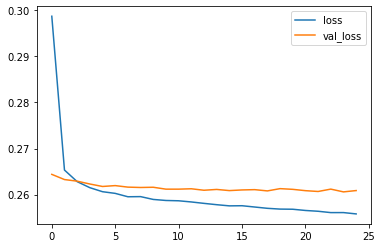

In [235]:
losses.plot()

### Try Stopping early

In [240]:
from tensorflow.keras.callbacks import EarlyStopping

In [245]:
early_stop= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [247]:
model.fit(x=X_train,y=y_train,epochs=25, batch_size=256,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2533 - val_loss: 0.2603
Epoch 2/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2530 - val_loss: 0.2606
Epoch 3/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2528 - val_loss: 0.2603
Epoch 4/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2529 - val_loss: 0.2623
Epoch 5/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2529 - val_loss: 0.2606
Epoch 6/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2528 - val_loss: 0.2613
Epoch 7/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2525 - val_loss: 0.2608
Epoch 8/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2526 - val_loss: 0.2605
Epoch 9/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2526 - val_loss: 0.2605
Epoch 10/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.252

In [248]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

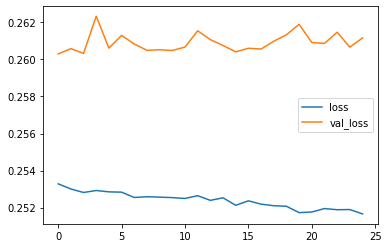

In [249]:
losses.plot()

### Creating Confusion matrix

In [250]:
from sklearn.metrics import classification_report,confusion_matrix

In [262]:
predictions=model.predict(X_test)

2471/2471 [==============================] - 1s 538us/step


In [266]:
print(classification_report(y_test,predictions))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [279]:
predictions
# these are the probabilities

array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 8.3912700e-01,
       1.0000000e+00, 1.2107427e-31], dtype=float32)

In [280]:
predictions=predictions.flatten()
# therefore needs to be converted to classes

In [269]:
predictions

array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 8.3912700e-01,
       1.0000000e+00, 1.2107427e-31], dtype=float32)

In [271]:
print(predictions.round(2))

[1.   1.   1.   ... 0.84 1.   0.  ]


In [273]:
y_pred = np.where(predictions > 0.5, 1, 0)

In [274]:
print(y_pred)

[1 1 1 ... 1 1 0]


### Now try confusion matrix

In [276]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



In [277]:
# We have unbalanced dataset, so accuracy is not the right metric

#### Look at the f1-score, precision and recall!

#### Predict a sample case

In [307]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [308]:
# The data is in panda series. Needs reshaping to numpy array

In [309]:
new_customer.values.reshape(1,78)

array([[2.5000e+04, 6.0000e+01, 1.8240e+01, 6.3811e+02, 6.1665e+04,
        3.0110e+01, 1.9960e+03, 1.6000e+01, 0.0000e+00, 2.7778e+04,
        6.5500e+01, 4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

In [310]:
# Scale the data to predict correct class. Needs transforming

In [311]:
new_customer=scaler.transform(new_customer.values.reshape(1,78))

In [312]:
new_customer_predictions=model.predict(new_customer)

1/1 [==============================] - 0s 16ms/step


In [313]:
new_customer_predictions=new_customer_predictions.flatten()

In [314]:
print(new_customer_predictions.round(2))

[0.55]


In [315]:
new_customer_predictions = np.where(new_customer_predictions > 0.5, 1, 0)

In [316]:
print(new_customer_predictions)

[1]


In [317]:
# So loan was repaid

In [318]:
# Check with original

In [319]:
df.iloc[random_ind]['loan_repaid']

1.0

## color{red}, text{64}